# Lamian lineage marker genes and regulons along pseudotime 

**Lamian**  
[Preprint](https://www.biorxiv.org/content/10.1101/2021.07.10.451910v1.full)  
[GitHub](https://github.com/Winnie09/Lamian)  
[Tutorial](https://winnie09.github.io/Wenpin_Hou/pages/Lamian.html)  

**Condiment**  
[Preprint](https://www.biorxiv.org/content/10.1101/2021.03.09.433671v1.full)  
[GitHub](https://github.com/HectorRDB/condiments)  
[Tutorial](https://hectorrdb.github.io/condimentsPaper/)  

https://github.com/statOmics/tradeSeq/issues/104  
https://github.com/statOmics/tradeSeq/issues/227

In [38]:
options(warn=-1)

In [39]:
library_load <- suppressMessages(
    
    list(
        
        # Seurat 
        library(Seurat), 
        
        # Condiment
        # library(condiments), 
        library(tradeSeq), 
        library(SingleCellExperiment), 
        
        # Data 
        library(tidyverse), 
        
        # Prallel 
        library(BiocParallel), 
        
        # Python 
        library(reticulate)
        
    )
    
)

In [40]:
random_seed <- 42
set.seed(random_seed)

In [41]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [42]:
# Source files
source("plotting_global.R")
source("bin/so_pl.R")

# Set parallel 

In [43]:
options(future.globals.maxSize=200000*1024^2)

In [44]:
# BPPARAM <- MulticoreParam(workers=32)
# register(BPPARAM)

# Import Data

In [45]:
# Seurat object 
so <- readRDS("data/scRNAseq/object/pp.rds")
so <- NormalizeData(so)

# DPT for erythroid lineage
dpt <- read.csv("result/pseudotime/ery_dpt.csv", row.names=1)

Normalizing layer: counts



# Subset Seurat Object to erythroid lineage

In [46]:
# Add dpt pseudotime 
so <- AddMetaData(so, dpt)
so <- subset(so, subset=celltype_low %in% c("MEP", "Proerythroblast", "Erythroblast"))

# Set DPT 

In [47]:
# Min max scale per condition 
minmax_scale <- function(x) {(x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))}
so@meta.data <- dplyr::group_by(so@meta.data, sample_group) %>% dplyr::mutate(dpt_pseudotime = minmax_scale(dpt_pseudotime)) %>% dplyr::ungroup() %>% as.data.frame() %>% tibble::column_to_rownames("cell_id")

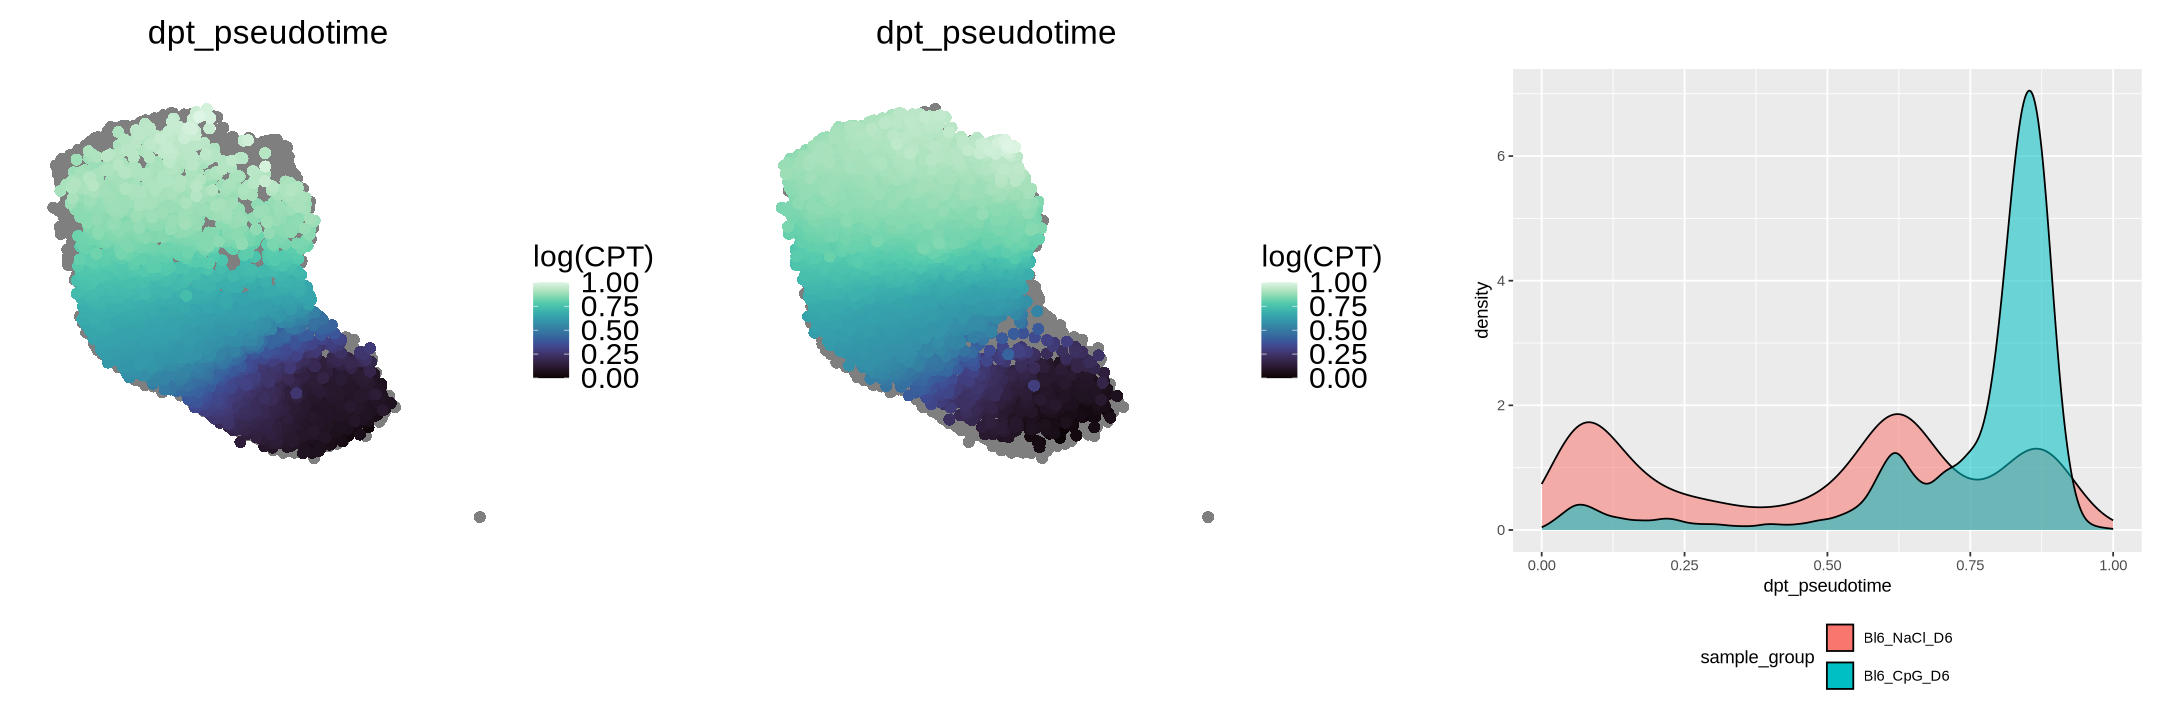

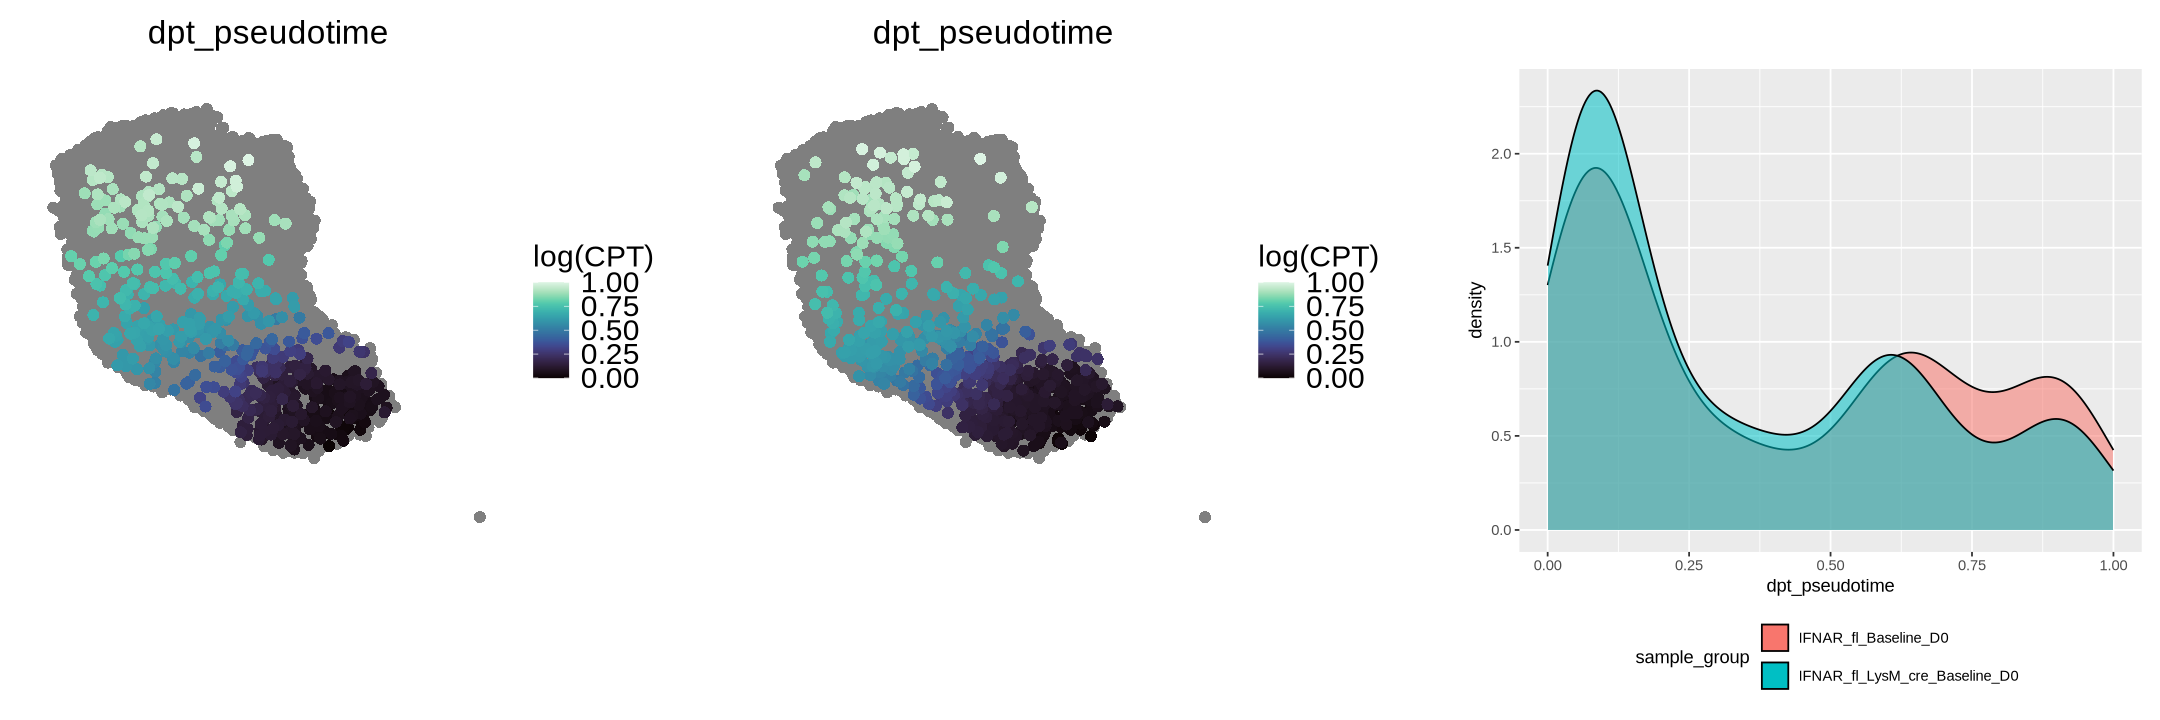

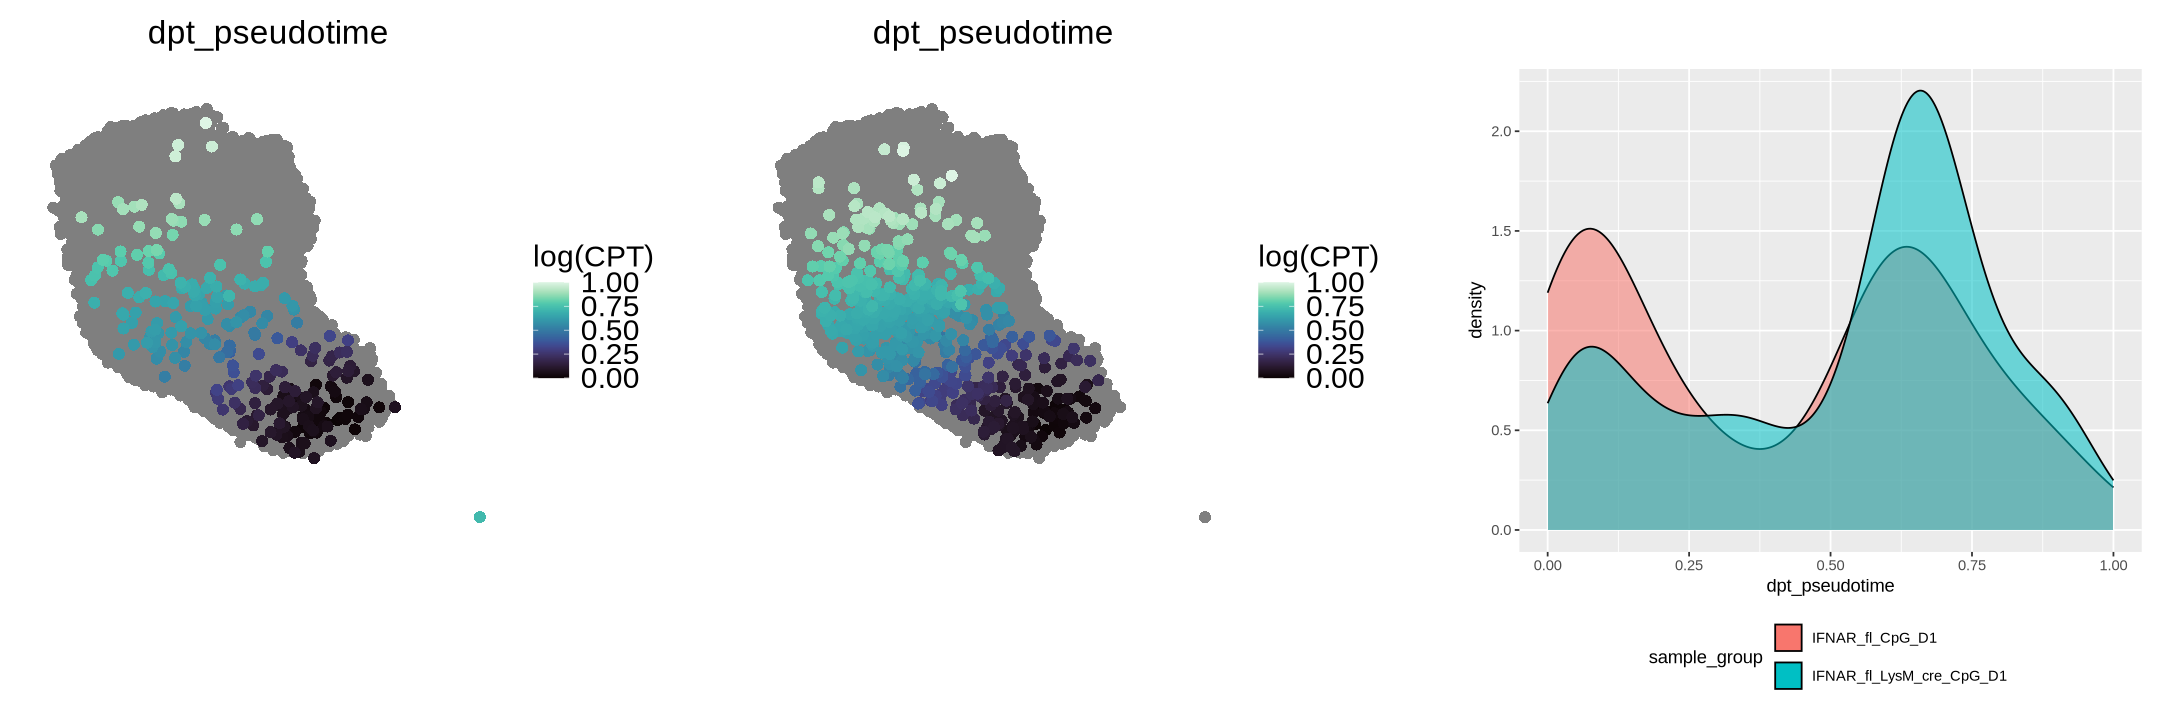

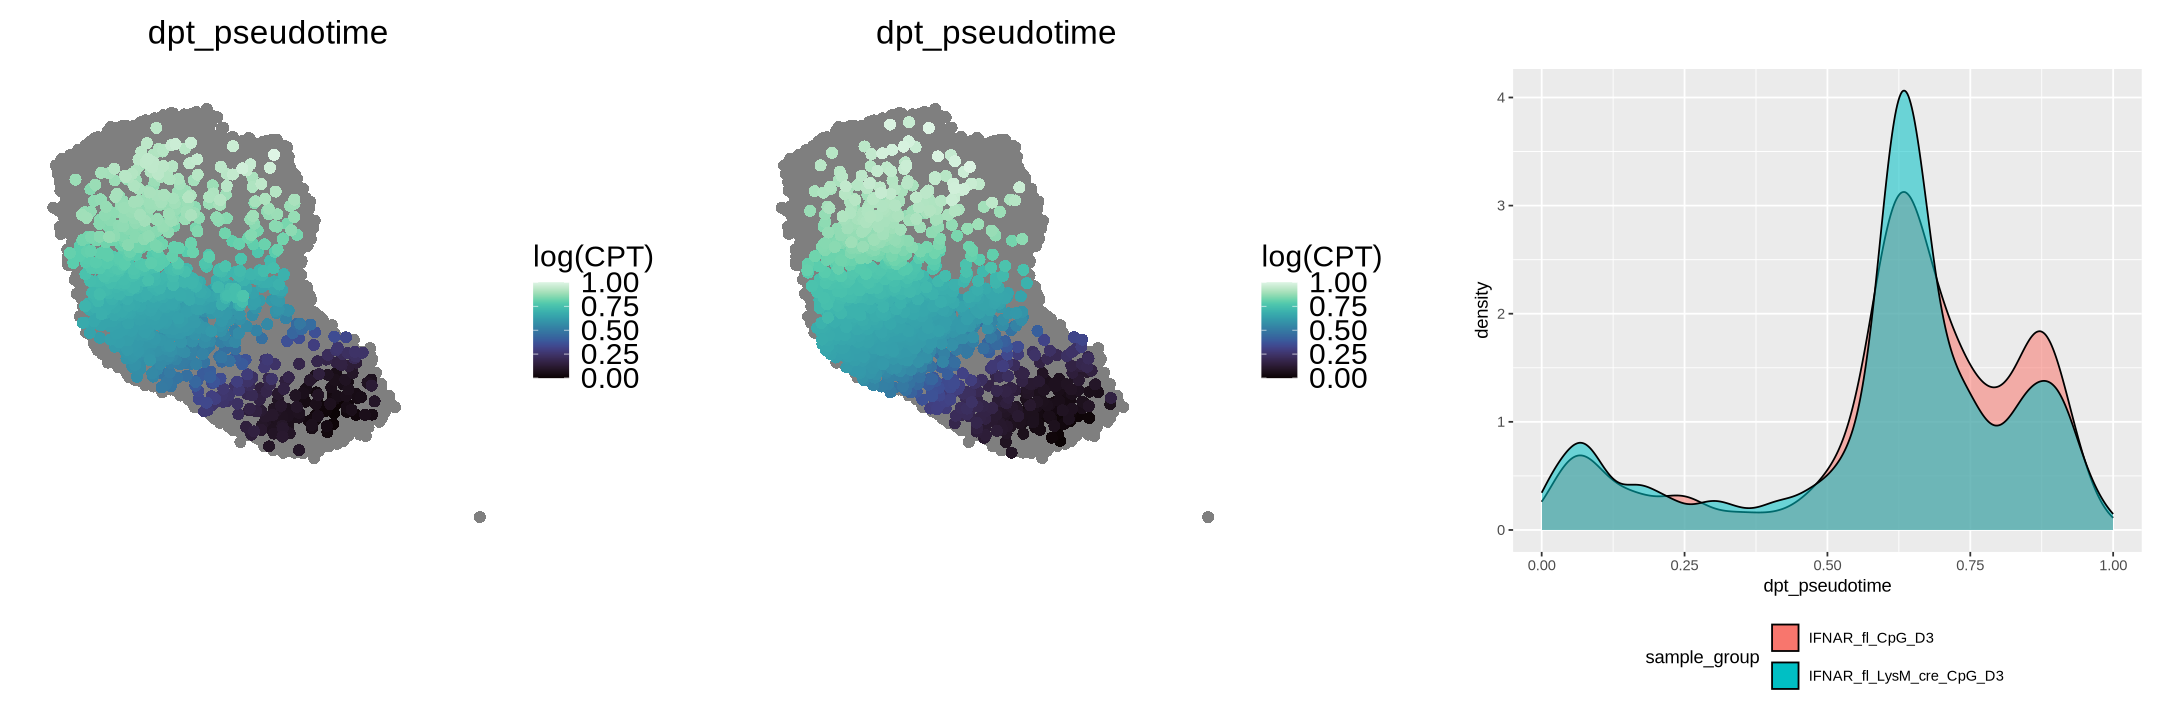

In [48]:
options(repr.plot.width=3*6, repr.plot.height=6)

fplot_1 <- fplot(so, features="dpt_pseudotime", assay="RNA", slot="data", pt_size=3, size_select=1, restrict=c("sample_group", "Bl6_NaCl_D6"))
fplot_2 <- fplot(so, features="dpt_pseudotime", assay="RNA", slot="data", pt_size=3, size_select=1, restrict=c("sample_group", "Bl6_CpG_D6"))

dplot_1 <- ggplot(subset(so, subset=sample_group %in% c("Bl6_NaCl_D6", "Bl6_CpG_D6"))@meta.data, aes(x=dpt_pseudotime, fill=sample_group, alpha=0.5)) + geom_density() + theme(legend.position="bottom") + guides(fill=guide_legend(nrow=2), alpha="none")

fplot_1 + fplot_2 + dplot_1 + patchwork::plot_layout(ncol=3)

fplot_1 <- fplot(so, features="dpt_pseudotime", assay="RNA", slot="data", pt_size=3, size_select=1, restrict=c("sample_group", "IFNAR_fl_Baseline_D0"))
fplot_2 <- fplot(so, features="dpt_pseudotime", assay="RNA", slot="data", pt_size=3, size_select=1, restrict=c("sample_group", "IFNAR_fl_LysM_cre_Baseline_D0"))
dplot_1 <- ggplot(subset(so, subset=sample_group %in% c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0"))@meta.data, aes(x=dpt_pseudotime, fill=sample_group, alpha=0.5)) + geom_density() + theme(legend.position="bottom") + guides(fill=guide_legend(nrow=2), alpha="none")

fplot_1 + fplot_2 + dplot_1 + patchwork::plot_layout(ncol=3)

fplot_1 <- fplot(so, features="dpt_pseudotime", assay="RNA", slot="data", pt_size=3, size_select=1, restrict=c("sample_group", "IFNAR_fl_CpG_D1"))
fplot_2 <- fplot(so, features="dpt_pseudotime", assay="RNA", slot="data", pt_size=3, size_select=1, restrict=c("sample_group", "IFNAR_fl_LysM_cre_CpG_D1"))

dplot_1 <- ggplot(subset(so, subset=sample_group %in% c("IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1"))@meta.data, aes(x=dpt_pseudotime, fill=sample_group, alpha=0.5)) + geom_density()  + theme(legend.position="bottom") + guides(fill=guide_legend(nrow=2), alpha="none")

fplot_1 + fplot_2 + dplot_1 + patchwork::plot_layout(ncol=3)

fplot_1 <- fplot(so, features="dpt_pseudotime", assay="RNA", slot="data", pt_size=3, size_select=1, restrict=c("sample_group", "IFNAR_fl_CpG_D3"))
fplot_2 <- fplot(so, features="dpt_pseudotime", assay="RNA", slot="data", pt_size=3, size_select=1, restrict=c("sample_group", "IFNAR_fl_LysM_cre_CpG_D3"))

dplot_1 <- ggplot(subset(so, subset=sample_group %in% c("IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3"))@meta.data, aes(x=dpt_pseudotime, fill=sample_group, alpha=0.5)) + geom_density() + theme(legend.position="bottom") + guides(fill=guide_legend(nrow=2), alpha="none")

fplot_1 + fplot_2 + dplot_1 + patchwork::plot_layout(ncol=3)

# Select lineage genes per sample group

In [49]:
# Genes to consider for ery lineage
cnt <- lapply(levels(so$sample_group), function(i) {GetAssayData(so[, so$sample_group==i], assay="RNA", slot="counts")})
names(cnt) <- levels(so$sample_group)

In [50]:
genes <- lapply(cnt, function(x) {

    # Select lineage genes
    genes_1 <- rownames(x[rowSums(x>=3)>=3, ])
    genes_2 <- rownames(x[rowSums(x>=1)>=10, ])
    
    genes_i <- intersect(genes_1, genes_2)

    return(genes_i)
    
}
               )

# Set pseudotime knots by celltype quantiles 

In [51]:
# Insepct percentiles per celltype
nknots <- 5
quant <- split(so@meta.data, f=so$celltype_low %>% droplevels())
quant <- lapply(quant, function(x) {

    lapply(split(x, f=x$sample_group), function(n) {stats::quantile(n$dpt_pseudotime, probs=(0:(nknots-1)) / (nknots-1))}) %>% data.frame() %>% rowMeans()
    
}
               ) %>% data.frame()

In [52]:
pt_knots <- list(
    
    t1=c(

        round(quant[, "MEP"][1], 2),
        round(quant[, "MEP"][3], 2),
        round(quant[, "Proerythroblast"][3], 2),
        round(quant[, "Erythroblast"][3], 2), 
        round(quant[, "Erythroblast"][5], 2)
        
    )

)
pt_knots

$t1
[1] 0.00 0.11 0.64 0.89 1.00

In [53]:
seq(0, 1, length.out=11)[0]

numeric(0)

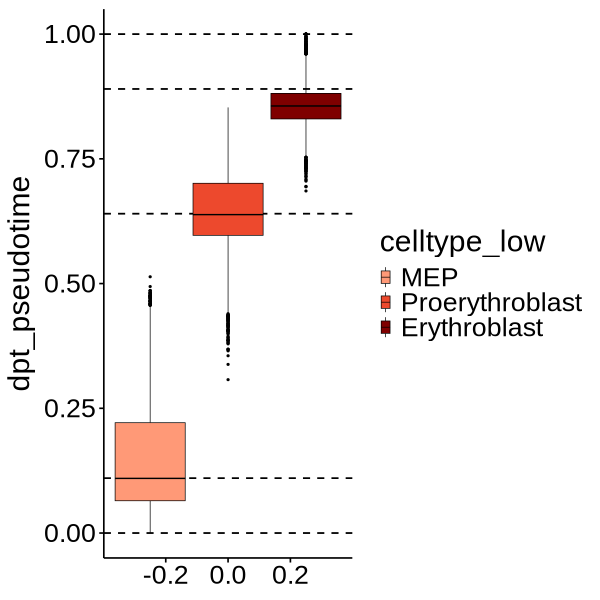

In [54]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(so@meta.data, aes(y=dpt_pseudotime, fill=celltype_low)) + 

    geom_hline(yintercept=pt_knots[[1]][1], linetype="dashed") + 
    geom_hline(yintercept=pt_knots[[1]][2], linetype="dashed") + 
    geom_hline(yintercept=pt_knots[[1]][3], linetype="dashed") + 
    geom_hline(yintercept=pt_knots[[1]][4], linetype="dashed") + 
    geom_hline(yintercept=pt_knots[[1]][5], linetype="dashed") + 
    geom_boxplot(outlier.size=0.25, linewidth=0.2, color="black") + 

    # facet_grid(~sample_group) + 
    
    scale_fill_manual(values=color$celltype_low) + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm")) + 
    theme_global_set(1)

In [55]:
saveRDS(data.frame(pt_knots=pt_knots[[1]]), "result/lineage/pt_knots.rds")

# Set pseudotime bins for DE testing 

In [56]:
pt_bins <- data.frame(

    dp_bins = c(
        
        seq(0, 1, length.out=11)[1],
        seq(0, 1, length.out=11)[2],
        seq(0, 1, length.out=11)[3],
        seq(0, 1, length.out=11)[4], 
        seq(0, 1, length.out=11)[5],
        seq(0, 1, length.out=11)[6],
        seq(0, 1, length.out=11)[7],
        seq(0, 1, length.out=11)[8],
        seq(0, 1, length.out=11)[9],
        seq(0, 1, length.out=11)[10], 
        seq(0, 1, length.out=11)[11]
    
    )
    
)

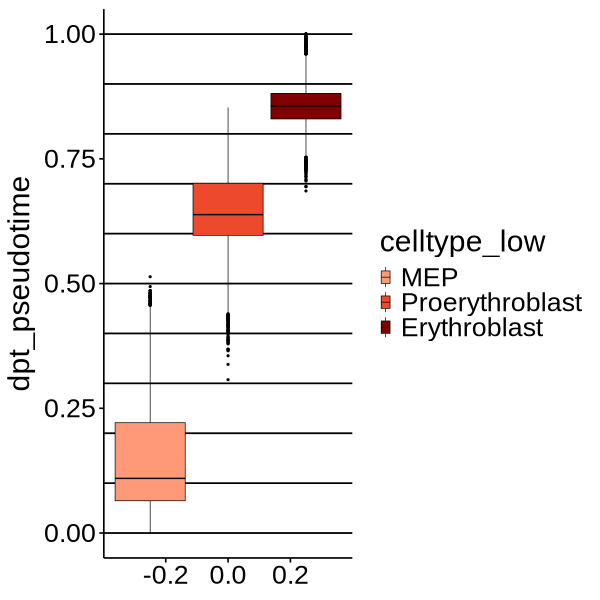

In [57]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(so@meta.data, aes(y=dpt_pseudotime, fill=celltype_low)) + 

    geom_hline(yintercept=pt_bins[[1]][1], linetype="solid") + 
    geom_hline(yintercept=pt_bins[[1]][2], linetype="solid") + 
    geom_hline(yintercept=pt_bins[[1]][3], linetype="solid") + 
    geom_hline(yintercept=pt_bins[[1]][4], linetype="solid") + 
    geom_hline(yintercept=pt_bins[[1]][5], linetype="solid") + 
    geom_hline(yintercept=pt_bins[[1]][6], linetype="solid") + 
    geom_hline(yintercept=pt_bins[[1]][7], linetype="solid") + 
    geom_hline(yintercept=pt_bins[[1]][8], linetype="solid") + 
    geom_hline(yintercept=pt_bins[[1]][9], linetype="solid") + 
    geom_hline(yintercept=pt_bins[[1]][10], linetype="solid") + 
    geom_hline(yintercept=pt_bins[[1]][11], linetype="solid") +

    geom_boxplot(outlier.size=0.25, linewidth=0.2, color="black") + 

    # facet_grid(~sample_group) + 
    
    scale_fill_manual(values=color$celltype_low) + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm")) + 
    theme_global_set(1)

In [ ]:
saveRDS(pt_bins, "result/lineage/pt_bins.rds")

# Fit GAM 

## TradeSeq result function to test association and condition perturbation 

In [ ]:
association_test <- function(fitgam, log2fc_association=0, padj_association=0.05) {

    # Association test end
    association_res_1 <- associationTest(fitgam, l2fc=log2fc_association, lineage=TRUE, inverse="Chol", contrastType="end")
    colnames(association_res_1) <- gsub("_lineage1_condition", "_", colnames(association_res_1))
    
    sample_group <- grep("waldStat_", colnames(association_res_1), value=TRUE) %>% gsub("waldStat_", "", .)
    ptag_1 <- lapply(sample_group, function(i) {
    
        x <- association_res_1[, grep(i, colnames(association_res_1), value=TRUE)]
    
        x[[paste0("pvalue_", i)]] <- ifelse(x[[paste0("pvalue_", i)]]==0, min(na.omit(x[[paste0("pvalue_", i)]][x[[paste0("pvalue_", i)]]>0])), x[[paste0("pvalue_", i)]])
        x[[paste0("padj_", i)]] <- p.adjust(x[[paste0("pvalue_", i)]], "BH")
        x[[paste0("ptag_", i)]] <- ifelse(x[[paste0("padj_", i)]] <= padj_association, TRUE, FALSE)
        x[[paste0("ptag_", i)]] <- ifelse(is.na(x[[paste0("ptag_", i)]]), FALSE, x[[paste0("ptag_", i)]])
    
        return(x)
        
    }
          )

    ptag_1 <- do.call(cbind, ptag_1)
    
    association_res_1 <- cbind(association_res_1[, 1:3], ptag_1)
    
    # Association test consecutive 
    association_res_2 <- associationTest(fitgam, l2fc=log2fc_association, lineage=TRUE, inverse="Chol", contrastType="consecutive")
    colnames(association_res_2) <- gsub("_lineage1_condition", "_", colnames(association_res_2))
    
    sample_group <- grep("waldStat_", colnames(association_res_2), value=TRUE) %>% gsub("waldStat_", "", .)
    ptag_2 <- lapply(sample_group, function(i) {
    
        x <- association_res_2[, grep(i, colnames(association_res_2), value=TRUE)]
    
        x[[paste0("pvalue_", i)]] <- ifelse(x[[paste0("pvalue_", i)]]==0, min(na.omit(x[[paste0("pvalue_", i)]][x[[paste0("pvalue_", i)]]>0])), x[[paste0("pvalue_", i)]])
        x[[paste0("padj_", i)]] <- p.adjust(x[[paste0("pvalue_", i)]], "BH")
        x[[paste0("ptag_", i)]] <- ifelse(x[[paste0("padj_", i)]] <= padj_association, TRUE, FALSE)
        x[[paste0("ptag_", i)]] <- ifelse(is.na(x[[paste0("ptag_", i)]]), FALSE, x[[paste0("ptag_", i)]])
    
        return(x)
        
    }
          )
    ptag_2 <- do.call(cbind, ptag_2)
    
    association_res_2 <- cbind(association_res_2[, 1:3], ptag_2)
    
    # PTAG result matrix 
    sample_group <- grep("waldStat_", colnames(association_res_2), value=TRUE) %>% gsub("waldStat_", "", .)
    ptag <- lapply(sample_group, function(i) {
    
        x <- data.frame(i=ptag_1[[paste0("ptag_", i)]] | ptag_1[[paste0("ptag_", i)]])
        
        colnames(x) <- i
        rownames(x) <- rownames(ptag_1)
        
        return(x)
        
    }
          )
    ptag <- do.call(cbind, ptag)

    return(list(association_res_1, association_res_2, ptag))

    
}

## BSF

In [ ]:
cache_tradeseq_1 <- FALSE

contrast_vec_1 <- c("Bl6_NaCl_D6", "Bl6_CpG_D6")

genes_1 <- do.call(c, genes[contrast_vec_1]) %>% unique()
message(paste0("Lineage genes ", length(genes_1)))

so_1 <- so[, so$sample_group %in% contrast_vec_1]

cnt_1 <- GetAssayData(so_1, assay="RNA", layer="counts")
cnt_1 <- cnt_1[genes_1, ]

pseudotime_1 <- so_1$dpt_pseudotime
conditions_1 <- factor(so_1$sample_group, levels=contrast_vec_1)

In [ ]:
if(!cache_tradeseq_1) {   

    fitgam_1 <- fitGAM(
    
        counts=cnt_1, 
        pseudotime=pseudotime_1,
        cellWeights=rep(1, length(pseudotime_1)),
        conditions=conditions_1, 
        nknots=length(pt_knots[[1]]),
        genes=rownames(cnt_1), 
        family="nb", 
        offset=NULL, 
        parallel=TRUE, 
        knotList=pt_knots,
        
        verbose=TRUE
    
    )

    # Create GAM list
    tradeseq_res_1 <- list(fitgam=fitgam_1)

    # Store results 
    saveRDS(tradeseq_res_1, "result/lineage/tradeseq_res_1.rds")
        
        
} else {

    # Load results 
    tradeseq_res_1 <- readRDS("result/lineage/tradeseq_res_1.rds")

}

In [ ]:
association_res_1 <- association_test(tradeseq_res_1[["fitgam"]], log2fc_association=0, padj_association=0.05)

In [ ]:
# Save full results of association test 
write.csv(association_res_1[[1]], "result/lineage/association_end_1.csv")
write.csv(association_res_1[[2]], "result/lineage/association_con_1.csv")

In [ ]:
# Add PTAG result to tradseq results 
tradeseq_res_1[["ptag"]] <- association_res_1[[3]]
saveRDS(tradeseq_res_1, "result/lineage/tradeseq_res_1.rds")

## VBC

In [ ]:
cache_tradeseq_2 <- FALSE

contrast_vec_2 <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_LysM_cre_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D3")

genes_2 <- do.call(c, genes[contrast_vec_2]) %>% unique()
message(paste0("Lineage genes ", length(genes_2)))

so_2 <- so[, so$sample_group %in% contrast_vec_2]

cnt_2 <- GetAssayData(so_2, assay="RNA", layer="counts")
cnt_2 <- cnt_2[genes_2, ]

pseudotime_2 <- so_2$dpt_pseudotime
conditions_2 <- factor(so_2$sample_group, levels=contrast_vec_2)

In [ ]:
if(!cache_tradeseq_2) {   

    fitgam_2 <- fitGAM(

        counts=cnt_2, 
        pseudotime=pseudotime_2,
        cellWeights=rep(1, length(pseudotime_2)),
        conditions=conditions_2, 
        nknots=length(pt_knots[[1]]),
        genes=rownames(cnt_2), 
        family="nb", 
        offset=NULL, 
        parallel=TRUE, 
        knotList=pt_knots, 
        verbose=TRUE

    )

    # Create GAM list
    tradeseq_res_2 <- list(fitgam=fitgam_2)

    # Store results 
    saveRDS(tradeseq_res_2, "result/lineage/tradeseq_res_2.rds")
        
        
} else {

    # Load results 
    tradeseq_res_2 <- readRDS("result/lineage/tradeseq_res_2.rds")

}

In [ ]:
association_res_2 <- association_test(tradeseq_res_2[["fitgam"]], log2fc_association=0, padj_association=0.05)

In [ ]:
# Save full results of association test 
write.csv(association_res_2[[1]], "result/lineage/association_end_2.csv")
write.csv(association_res_2[[2]], "result/lineage/association_con_2.csv")

In [ ]:
# Add PTAG result to tradseq results 
tradeseq_res_2[["ptag"]] <- association_res_2[[3]]
saveRDS(tradeseq_res_2, "result/lineage/tradeseq_res_2.rds")

# Session info 

In [ ]:
sessionInfo()